In [138]:
import importlib
from IPython.display import display
import ipywidgets as widgets
from models.KawsAIModel import KawsAIModel as KAM
from preprocessing.preprocesador import Preprocesador
import pandas as pd
import numpy as np

def input_con_etiqueta(etiqueta, widget):
    return widgets.VBox([widgets.Label(value=etiqueta), widget])

estudiante_guardado = {}

# Crear inputs
nombre_completo = widgets.Text()
correo = widgets.Text()
carrera = widgets.Text()
ciclo_actual = widgets.IntText()
ubicacion = widgets.Text()
areas_interes = widgets.Text()
habilidades_destacadas = widgets.Text()
motivacion_principal = widgets.Text()
descripcion_personal = widgets.Textarea()
horas_semanales = widgets.IntSlider(value=20, min=0, max=40, step=1)
modalidad_de_trabajo = widgets.Dropdown(options=['Presencial', 'Híbrido', 'Remoto'], value='Remoto')
experiencia_relevante = widgets.Textarea()
link_portafolio_cv = widgets.Text()

# Botón
boton_enviar = widgets.Button(description="Guardar estudiante")

# Función al presionar el botón
def al_enviar(b):
    global estudiante_guardado  # Accede a la variable global
    estudiante_guardado = {
        "nombre_completo": nombre_completo.value,
        "correo": correo.value,
        "carrera": carrera.value,
        "ciclo_actual": ciclo_actual.value,
        "ubicacion": ubicacion.value,
        "areas_interes": areas_interes.value,
        "habilidades_destacadas": habilidades_destacadas.value,
        "motivacion_principal": motivacion_principal.value,
        "descripcion_personal": descripcion_personal.value,
        "horas_semanales": horas_semanales.value,
        "modalidad_de_trabajo": modalidad_de_trabajo.value,
        "experiencia_relevante": experiencia_relevante.value,
        "link_portafolio_cv": link_portafolio_cv.value
    }

    print("✅ Estudiante guardado:")
    for k, v in estudiante_guardado.items():
        print(f"{k}: {v}")

# Asociar el evento al botón
boton_enviar.on_click(al_enviar)

# Mostrar formulario
formulario = widgets.VBox([
    input_con_etiqueta("nombre_completo", nombre_completo),
    input_con_etiqueta("correo", correo),
    input_con_etiqueta("carrera", carrera),
    input_con_etiqueta("ciclo_actual", ciclo_actual),
    input_con_etiqueta("ubicacion", ubicacion),
    input_con_etiqueta("areas_interes", areas_interes),
    input_con_etiqueta("habilidades_destacadas", habilidades_destacadas),
    input_con_etiqueta("motivacion_principal", motivacion_principal),
    input_con_etiqueta("descripcion_personal", descripcion_personal),
    input_con_etiqueta("horas_semanales", horas_semanales),
    input_con_etiqueta("modalidad_de_trabajo", modalidad_de_trabajo),
    input_con_etiqueta("experiencia_relevante", experiencia_relevante),
    input_con_etiqueta("link_portafolio_cv", link_portafolio_cv),
    boton_enviar
])

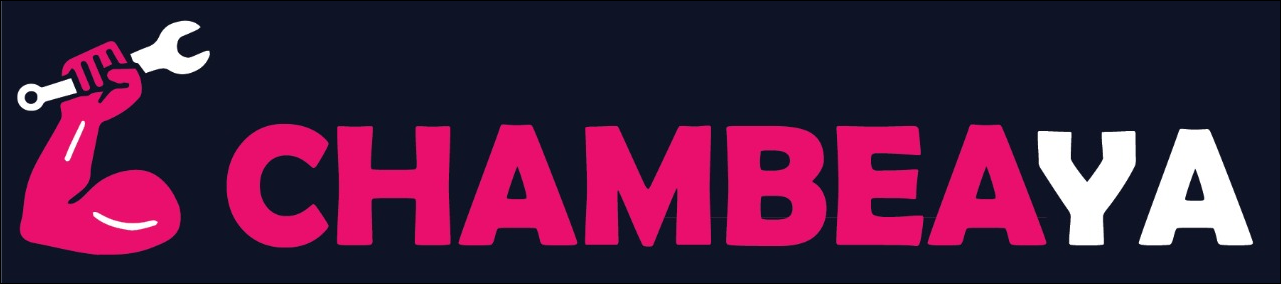
# ChambeaYA presenta KawsAI! 
#### Un modelo de IA que nos permite dar los mejores match entre estudiantes y puestos de Trabajo

In [129]:
display(formulario)

In [240]:
from models.KawsAIModel import KawsAIModel
importlib.reload(models.KawsAIModel)

<module 'models.KawsAIModel' from '/home/diegomucha/me/programming/projects/chambeaya-ai-core/models/KawsAIModel.py'>

In [255]:
puestos = pd.read_csv("datasets/puestos_test.csv")
estudiantes = pd.read_csv("datasets/estudiantes_test.csv")
estudiante_guardado = {
    'carrera': "Psicología",
    'habilidades_destacadas': "Escucha activa, Empatía, Comunicación efectiva, Resolución de conflictos",
    'areas_interes': "Psicología clínica, Psicología educativa, Intervención en crisis",
    'descripcion_personal': "Estudiante de psicología comprometido con el bienestar emocional de las personas, con interés en el desarrollo humano y la intervención psicológica.",
    'experiencia_relevante': "Prácticas en centros de orientación escolar y participación en talleres de salud mental comunitaria",
    'modalidad': 1,  # 1: Remoto, 2: Presencial, 3: Híbrido
    'disponibilidad_semanal': 15
}

puesto_guardado = {
    'titulo_puesto': "Ejecutivo Comercial Internacional",
    'descripcion_puesto': "Identifica oportunidades de exportación, genera cotizaciones, coordina envíos internacionales y da soporte administrativo en ferias y contacto con clientes extranjeros.",
    'area_del_puesto': "Negocios Internacionales",
    'requisitos': "Manejo de Excel avanzado; conocimiento de Incoterms; comunicación efectiva"
}
estudiante_nuevo = pd.DataFrame([estudiante_guardado])
puesto_nuevo = pd.DataFrame([puesto_guardado])

In [256]:
estudiante_nuevo.head()

,carrera,habilidades_destacadas,areas_interes,descripcion_personal,experiencia_relevante,modalidad,disponibilidad_semanal
0,Psicología,"Escucha activa, Empatía, Comunicación efectiva...","Psicología clínica, Psicología educativa, Inte...",Estudiante de psicología comprometido con el b...,Prácticas en centros de orientación escolar y ...,1,15


In [257]:
puesto_nuevo.head()

,titulo_puesto,descripcion_puesto,area_del_puesto,requisitos
0,Ejecutivo Comercial Internacional,"Identifica oportunidades de exportación, gener...",Negocios Internacionales,Manejo de Excel avanzado; conocimiento de Inco...


## Ahora vamos a usar nuestro modelo KawsAI para poder realizar tu match ideal!

In [62]:
preprocesador = Preprocesador()
puestos_procesados = preprocesador.get_embeddings_alloffers(puestos)
estudiantes_embeddings = preprocesador.get_embeddings_allstudents(estudiantes)

Batches:   0%|          | 0/22 [00:00<?, ?it/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

In [258]:
estudiante_procesado = preprocesador.get_embedding_student(estudiante_nuevo)
puesto_procesado = preprocesador.get_embedding_offer(puesto_nuevo)

In [259]:
aimodel = KawsAIModel()
distancias_mejores_puestos, indices_mejores_puestos = aimodel.get_best_offers(puestos_procesados, estudiante_procesado)
puestos.iloc[indices_mejores_puestos]

,id_puesto,titulo_puesto,descripcion_puesto,area_del_puesto,modalidad_de_trabajo,ubicacion,horas_semanales,horario,idiomas_requeridos,requisitos,fecha_inicio,duracion_del_puesto,fecha_limite_postulacion,tipo_contrato,sueldo_aproximado
431,PSTPSI002,Apoyo en consejería psicológica escolar,Brinda soporte a psicólogos en entrevistas con...,Psicología,Presencial,Callao,25,Fijo,Español,"Conocimiento en psicología educativa, redacció...",2025-08-03,6.0,2025-07-27,Pasantía,1250.0
430,PSTPSI001,Facilitador en talleres de habilidades sociales,Apoya en dinámicas grupales con adolescentes p...,Psicología,Presencial,Lima,25,Fijo,Español,"Conocimientos básicos en desarrollo humano, em...",2025-08-01,6.0,2025-07-25,Pasantía,1300.0
438,PSTPSI009,Técnico en orientación vocacional,Apoya en elaboración de informes y entrevistas...,Psicología,Presencial,Lima,30,Fijo,Español,"Conocimiento de pruebas vocacionales, redacció...",2025-08-17,6.0,2025-08-10,Pasantía,1300.0


In [248]:
i = 1
for distancia in distancias_mejores_puestos:
    print(f"Similitud con puesto {i}: {distancia}")
    i += 1

Similitud con puesto 1: 0.775987982749939
Similitud con puesto 2: 0.7393450736999512
Similitud con puesto 3: 0.6837419867515564


In [261]:
distancias_mejores_estudiantes, indices_mejores_estudiantes = aimodel.get_best_students(estudiantes_embeddings, puesto_procesado)
estudiantes.iloc[indices_mejores_estudiantes]

,Unnamed: 0,id_estudiante,nombre_completo,correo,carrera,ciclo_actual,ubicacion,areas_interes,habilidades_destacadas,motivacion_principal,descripcion_personal,horas_semanales,modalidad_de_trabajo,experiencia_relevante,link_portafolio_cv
4257,4257,EST04258,Diego Fernández Torres,diego.fernández4258@gmail.com,Administración,8,Tacna,Marketing,"Power BI, Gestión de Proyectos, Excel",Contribuir a una empresa innovadora,Orientado a resultados,10,Remoto,Apoyo en campañas de marketing digital,https://cv.example.com/diego4258
2772,2772,EST02773,Daniela Lopez Castillo,daniela.lopez2773@outlook.com,Administración,3,Ayacucho,Marketing,"Power BI, Contabilidad, Gestión de Proyectos",Crecimiento profesional,Orientado a resultados,20,Híbrido,Apoyo en campañas de marketing digital,https://cv.example.com/daniela2773
2395,2395,EST02396,Daniela Gómez Herrera,daniela.gómez2396@yahoo.com,Administración,9,Huancayo,Marketing,"Power BI, Contabilidad, Gestión de Proyectos",Aportar a la sociedad,Buen comunicador,30,Híbrido,Apoyo en campañas de marketing digital,https://cv.example.com/daniela2396


In [263]:
i = 1
for distancia in distancias_mejores_estudiantes:
    print(f"Similitud con puesto {i}: {distancia}")
    i += 1

Similitud con puesto 1: 0.5419164896011353
Similitud con puesto 2: 0.5383914709091187
Similitud con puesto 3: 0.5372182130813599
